In [ ]:
# Загружаем нужные библиотеки

# Математика и анализ данных
import numpy as np
import pandas as pd

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Машинное обучение (линейная регрессия и метрики)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# Импорт csv с диска
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/My Drive/shanghai_wheather_2014_2021.csv'

data = pd.read_csv(csv_path, index_col=0)

data.head()

In [110]:
# Очищаем датасет

wheather_data_clean = data.drop(['maxtempC', 'mintempC', 'totalSnow_cm', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'cloudcover', 'winddirDegree', 'AQI', 'AQI_Explained', 'WindGustKmph'], axis=1)

wheather_data_clean.head()

,sunHour,uvIndex,humidity,precipMM,pressure,tempC,visibility,windspeedKmph
date,,,,,,,,
2014-01-01,8.7,4.0,43.0,0.0,1021.0,15.0,10.0,12.0
2014-01-02,8.7,4.0,60.0,0.0,1019.0,14.0,10.0,14.0
2014-01-03,8.7,4.0,55.0,0.0,1017.0,16.0,10.0,14.0
2014-01-04,5.5,2.0,68.0,0.1,1022.0,10.0,10.0,14.0
2014-01-05,8.7,3.0,66.0,0.0,1024.0,10.0,10.0,6.0


In [111]:
# Сбрасываем индекс для корректного отображения даты

wheather_data_clean = wheather_data_clean.reset_index()

In [112]:
# Делаем выборку в виде 100 случайных дней

random_data = wheather_data_clean.sample(n=100, random_state=42)

In [113]:
data_rainy_days_total = np.sum(wheather_data_clean['humidity'] > 90)
data_minus_temp_days_total = np.sum(wheather_data_clean['tempC'] < 0)
data_plus_temp_days_total = np.sum(wheather_data_clean['tempC'] > 0)

print('Total rainy days: ', data_rainy_days_total)
print('Total minus temperature days: ', data_minus_temp_days_total)
print('Total plus temperature days: ', data_plus_temp_days_total)

Total rainy days:  105
Total minus temperature days:  2
Total plus temperature days:  2500


In [114]:
percentile_temp_95 = np.percentile(random_data['tempC'], 95)

above_95 = random_data['tempC'] > percentile_temp_95

days_above_95 = random_data['date'][above_95]
temps_above_95 = random_data['tempC'][above_95]

print("Дни с аномально высокой температурой (выше 95% перцентиля):")
print("Дни:", days_above_95)
print("Температура:", temps_above_95)

Дни с аномально высокой температурой (выше 95% перцентиля):
Дни: 2330    2020-08-11
1259    2017-08-28
Name: date, dtype: object
Температура: 2330    36.0
1259    36.0
Name: tempC, dtype: float64


In [80]:
percentile_temp_5 = np.percentile(random_data['tempC'], 5)

under_5 = random_data['tempC'] < percentile_temp_5

days_under_5 = random_data['date'][under_5]
temps_under_5 = random_data['tempC'][under_5]

print("Дни с аномально низкой температурой (ниже 5% перцентиля):")
print("Дни:", days_under_5)
print("Температура:", temps_under_5)

Дни с аномально низкой температурой (ниже 5% перцентиля):
Дни: 1406    2018-01-26
1770    2019-01-26
1744    2018-12-31
43      2014-02-13
Name: date, dtype: object
Температура: 1406    1.0
1770    6.0
1744    6.0
43      7.0
Name: tempC, dtype: float64


In [81]:
percentile_humidity_95 = np.percentile(random_data['humidity'], 95)

hum_above_95 = random_data['humidity'] > percentile_humidity_95

days_hum_above_95 = random_data['date'][hum_above_95]
humidity_above_95 = random_data['humidity'][hum_above_95]

print("Дни с аномально высокой влажностью (выше 95% перцентиля):")
print("Дни:", days_hum_above_95)
print("Влажность:", humidity_above_95)

Дни с аномально высокой влажностью (выше 95% перцентиля):
Дни: 56      2014-02-26
1001    2016-12-13
212     2014-08-01
1193    2017-06-23
1116    2017-04-07
Name: date, dtype: object
Влажность: 56      94.0
1001    91.0
212     94.0
1193    93.0
1116    95.0
Name: humidity, dtype: float64


In [82]:
percentile_humidity_5 = np.percentile(random_data['humidity'], 5)

hum_under_5 = random_data['humidity'] < percentile_humidity_5

days_hum_under_5 = random_data['date'][hum_under_5]
humidity_under_5 = random_data['humidity'][hum_under_5]

print("Дни с аномально низкой влажностью (ниже 5% перцентиля):")
print("Дни:", days_hum_under_5)
print("Влажность:", humidity_under_5)

Дни с аномально низкой влажностью (ниже 5% перцентиля):
Дни: 2472    2021-01-01
1730    2018-12-17
741     2016-03-27
2239    2020-05-12
2104    2019-12-27
Name: date, dtype: object
Влажность: 2472    34.0
1730    50.0
741     49.0
2239    36.0
2104    40.0
Name: humidity, dtype: float64


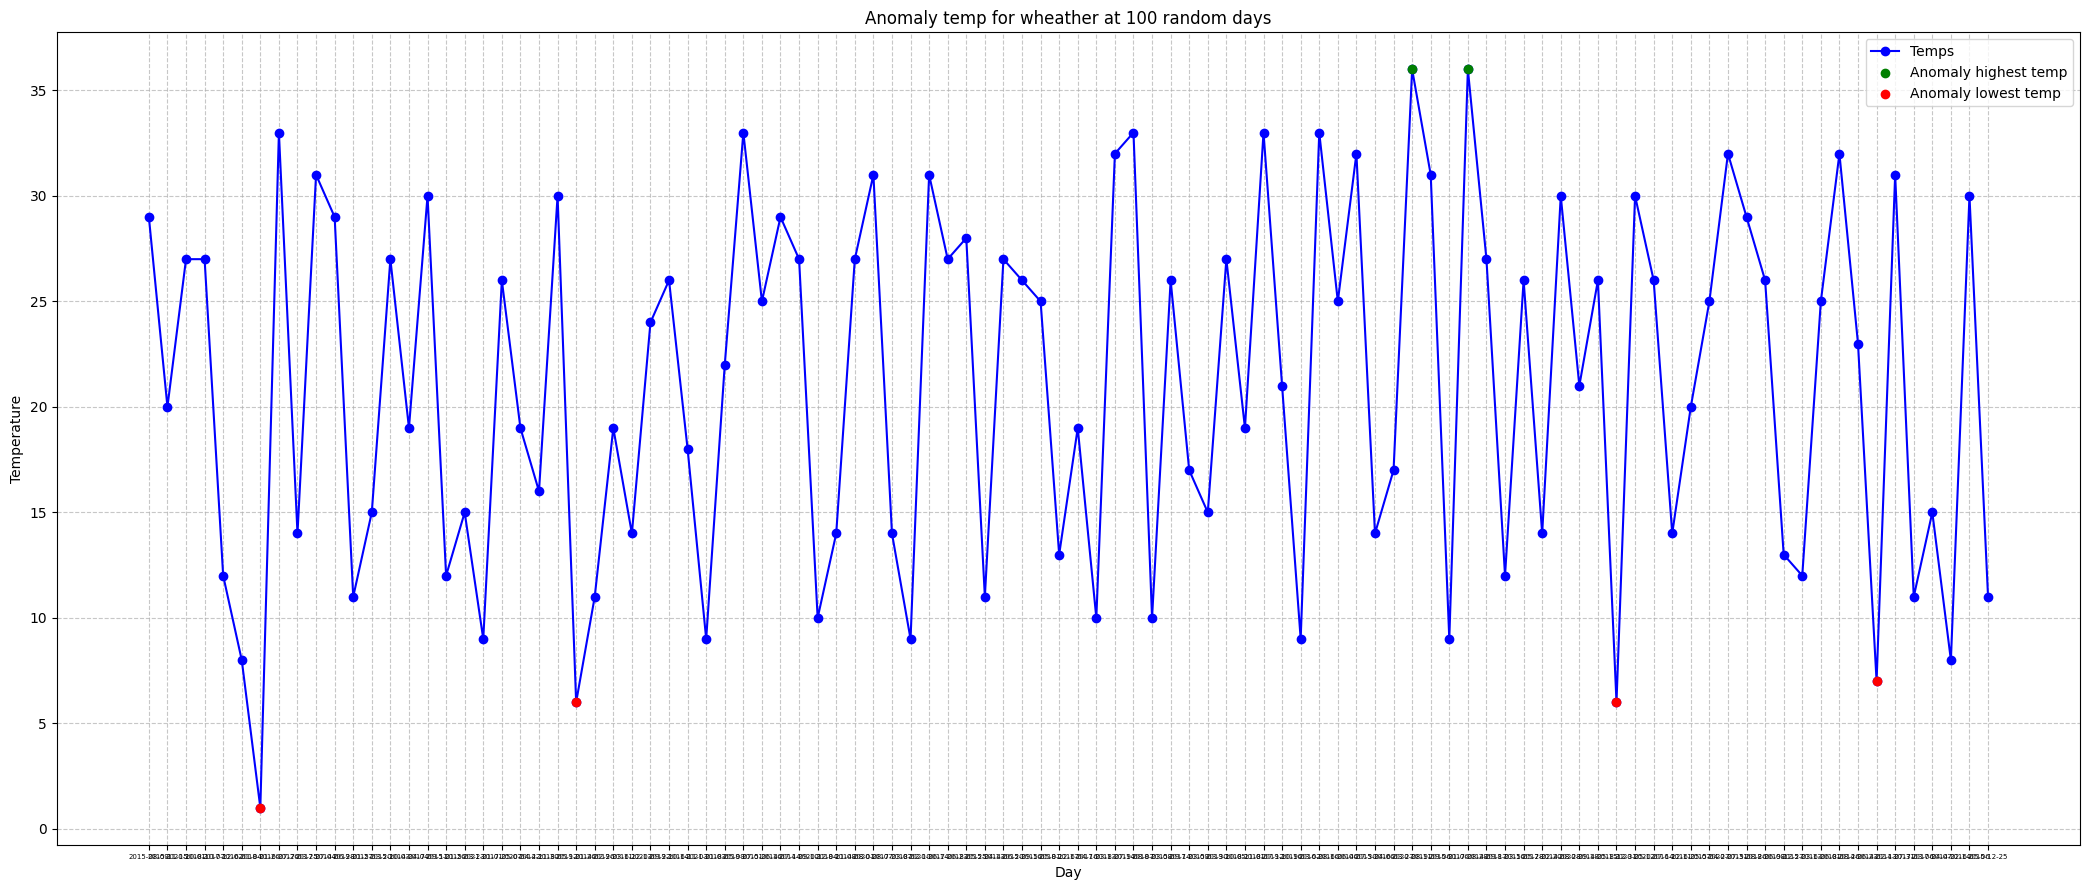

In [83]:
# Строим график аномалий температуры за 100 случайных дней

plt.figure(figsize=(21, 9))
plt.plot(random_data['date'], random_data['tempC'], label='Temps', marker='o', linestyle='-', color='blue')

plt.scatter(days_above_95, temps_above_95, color='green', label='Anomaly highest temp', zorder=5)

plt.scatter(days_under_5, temps_under_5, color='red', label='Anomaly lowest temp', zorder=5)

plt.title('Anomaly temp for wheather at 100 random days')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.xticks(fontsize=5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

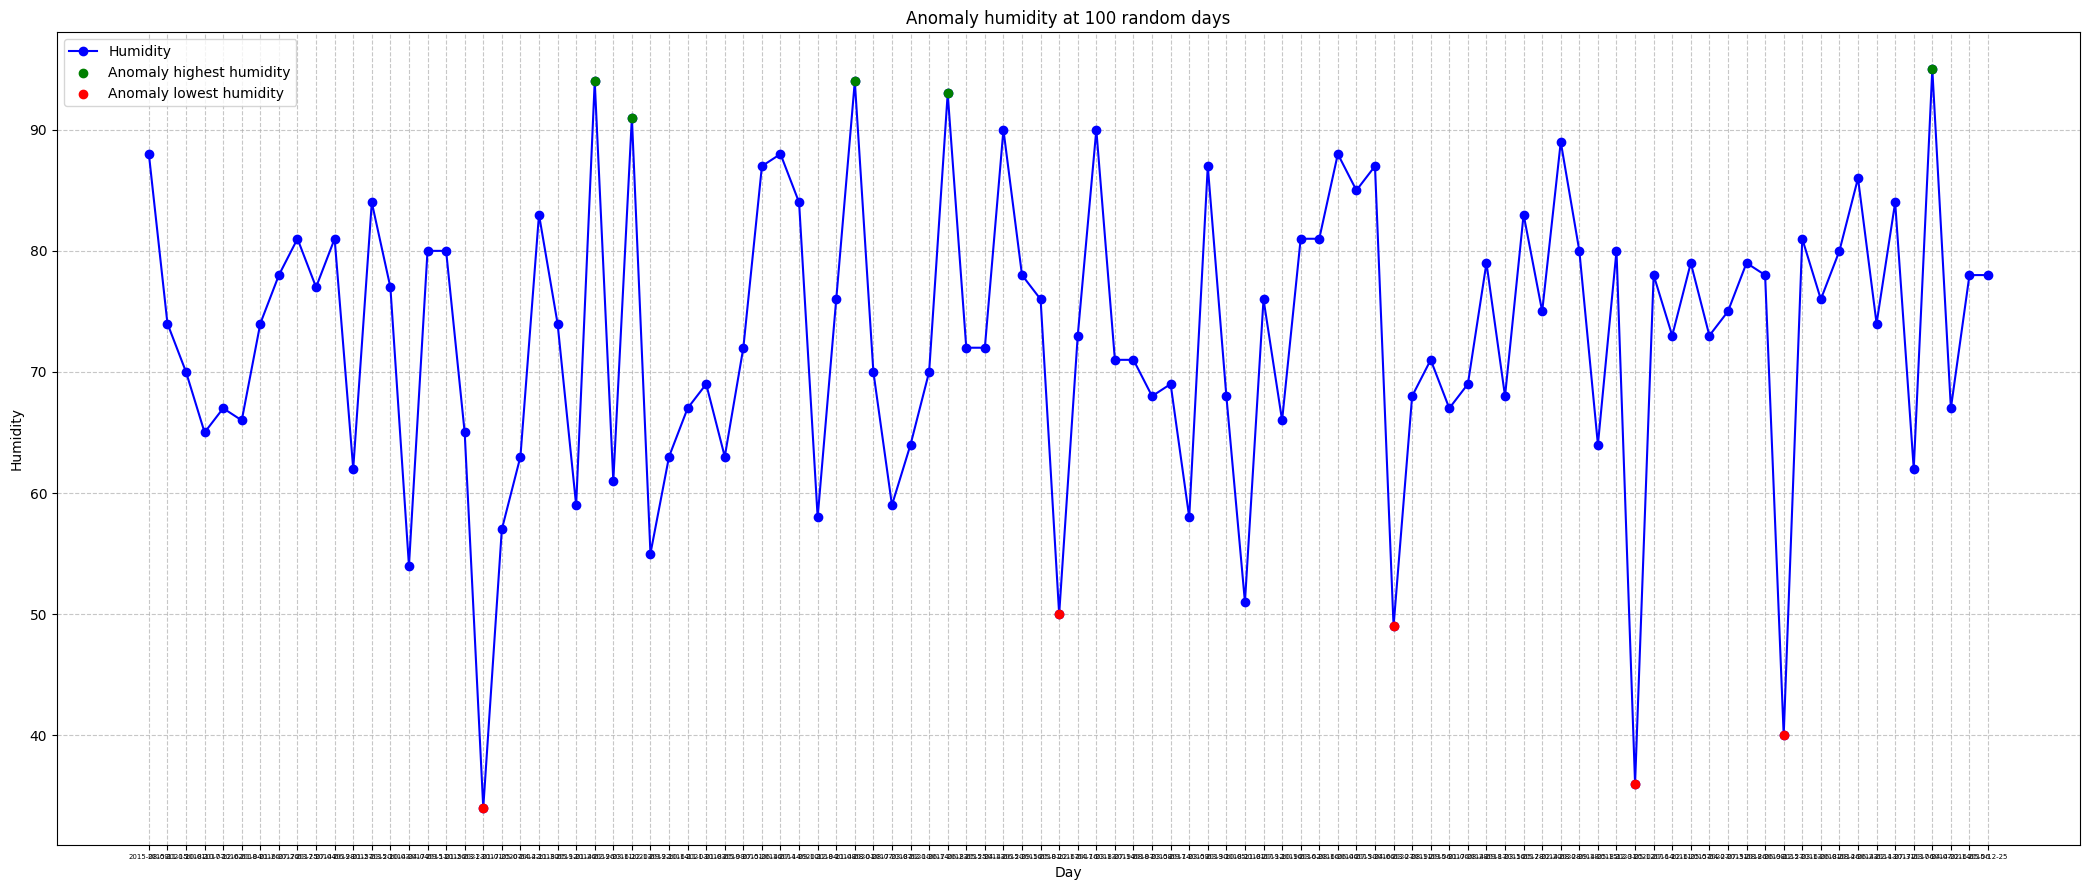

In [71]:
# Строим график аномалий влажности за 100 случайных дней

plt.figure(figsize=(21, 9))
plt.plot(random_data['date'], random_data['humidity'], label='Humidity', marker='o', linestyle='-', color='blue')

plt.scatter(days_hum_above_95, humidity_above_95, color='green', label='Anomaly highest humidity', zorder=5)

plt.scatter(days_hum_under_5, humidity_under_5, color='red', label='Anomaly lowest humidity', zorder=5)

plt.title('Anomaly humidity at 100 random days')
plt.xlabel('Day')
plt.ylabel('Humidity')
plt.xticks(fontsize=5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [115]:
# Сохраняем данные в csv

wheather_data_clean.to_csv('/content/drive/My Drive/shanghai_wheather_2014_2021_cleaned.csv')

In [119]:
# Выбор признаков и целевой переменной
X = wheather_data_clean[['sunHour', 'uvIndex', 'humidity', 'precipMM', 'pressure', 'visibility', 'windspeedKmph']]
y = wheather_data_clean['tempC']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание температуры
y_pred = model.predict(X_test)

# Метрики оценки модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.398562280137371
R-squared: 0.9387285628697988


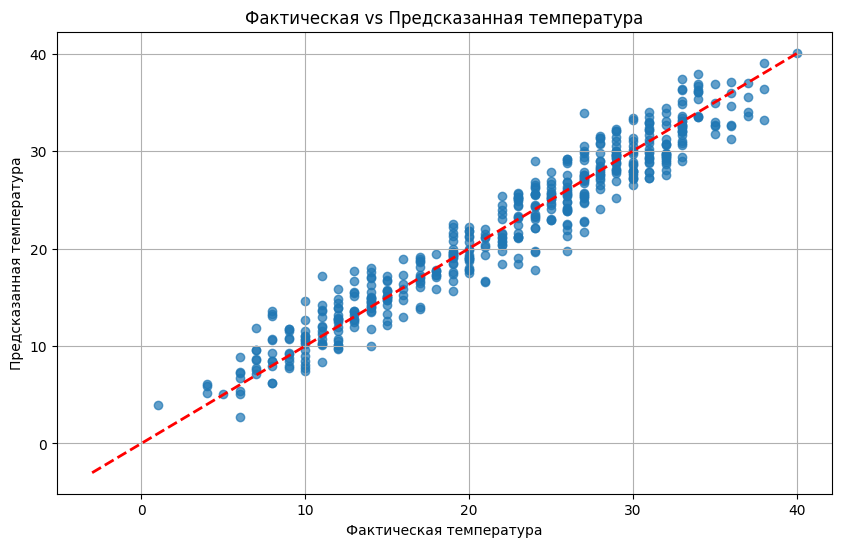

In [120]:
# График

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Фактическая температура')
plt.ylabel('Предсказанная температура')
plt.title('Фактическая vs Предсказанная температура')
plt.grid()
plt.show()

In [87]:
# Вычисление остаточных значений

residuals = y_test - y_pred

print(residuals)

582     1.304589
679    -1.831956
2381   -0.401484
1660    1.411768
1351   -1.158744
          ...   
1303    1.184418
1742   -1.177135
2497   -1.889931
1572    3.785147
299     0.677605
Name: tempC, Length: 501, dtype: float64


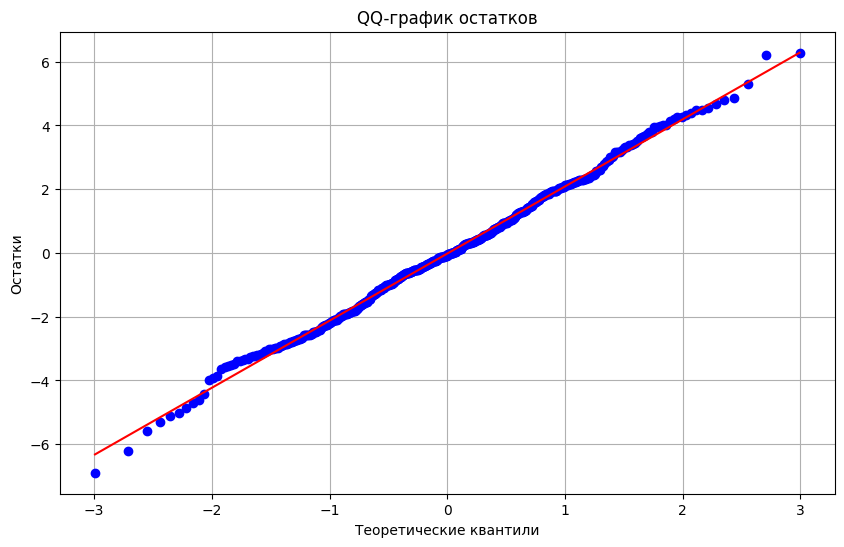

In [88]:
# QQ-график для проверки нормальности

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-график остатков')
plt.xlabel('Теоретические квантили')
plt.ylabel('Остатки')
plt.grid()
plt.show()

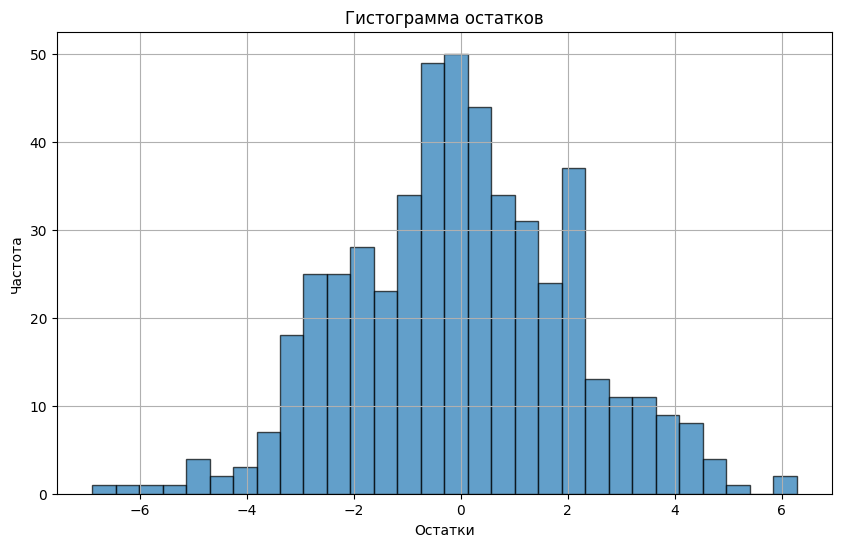

In [89]:
# Гистограмма остатков

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.grid()
plt.show()

In [121]:
# Пример новых данных для предсказания

new_data = pd.DataFrame({
    'sunHour': [5.6],
    'uvIndex': [3.5],
    'humidity': [38],
    'precipMM': [0.3],
    'pressure': [1050],
    'visibility': [16.9],
    'windspeedKmph': [2.0]
})

# Предсказание
predicted_temperature = model.predict(new_data)
print(f'Предсказанная температура: {predicted_temperature[0]:.2f} °C')

Предсказанная температура: 8.71 °C
